##Scoring nim Variation


Basic 2D scoring nim
rules - every stone a person removes , that person gets one point
- the person to remove the last stone gets N points(+ve,0 or -ve)
- there are 2 piles of stones with each n stones
- a person can remove any number of stones from one pile
- the colour represents the difference in scores of the first player and the second player(payoff function) when they start from that particular initial position and they play perfectly






[[0 1 2 3 4]
 [1 0 1 2 3]
 [2 1 0 1 2]
 [3 2 1 0 1]
 [4 3 2 1 0]]


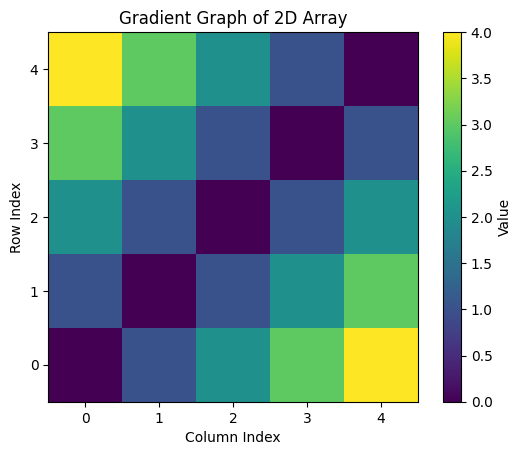

In [30]:
import numpy as np
N = 0
def move(point,arr):
  list1 = []
  for i in range(point[0]):
    list1.append(point[0]-i-arr[i,point[1]])
  for i in range(point[1]):
    list1.append(point[1]-i-arr[point[0],i])
  if len(list1)==0:
    return arr
  arr[point[0],point[1]] = max(list1)
  return arr
shape = (5,5)
arr = np.full(shape,0)
arr[0,0] = -N
for i in range(shape[0]):
  for j in range(shape[1]):
    arr = move([i,j],arr)
print(arr)

import matplotlib.pyplot as plt

plt.imshow(arr, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')

plt.title('Gradient Graph of 2D Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.gca().invert_yaxis()

plt.show()


3d scoring nim
rules - there are 3 piles with n stones each
- all other rules are the same

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

N = 2

def move(point,arr):
  list1 = []
  for i in range(point[0]):
    list1.append(point[0]-i-arr[i,point[1],point[2]])
  for i in range(point[1]):
    list1.append(point[1]-i-arr[point[0],i,point[2]])
  for i in range(point[2]):
    list1.append(point[2]-i-arr[point[0],point[1],i])
  if len(list1)==0:
    return arr
  arr[point[0],point[1],point[2]] = max(list1)
  return arr
shape = (5,5,5)
arr = np.full(shape,0)
arr[0,0,0] = -N
for i in range(shape[0]):
  for j in range(shape[1]):
    for k in range(shape[2]):
      arr = move([i,j,k],arr)
print(arr)



# Example 3D matrix (you can replace this with your own)  # shape: (depth, rows, columns)

# Function to plot a slice at given depth
def show_slice(k):
    plt.figure(figsize=(6, 5))
    plt.imshow(arr[k], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(f"Slice at depth = {k}")
    plt.xlabel("Column index")
    plt.ylabel("Row index")
    plt.gca().invert_yaxis()
    plt.show()

# Interactive slider
interact(
    show_slice,
    k=IntSlider(min=0, max=arr.shape[0]-1, step=1, value=0, description='Depth')
)


[[[-2  3  4  5  6]
  [ 3 -2  3  4  5]
  [ 4  3 -2  3  4]
  [ 5  4  3 -2  3]
  [ 6  5  4  3 -2]]

 [[ 3 -2  3  4  5]
  [-2  3  4  5  6]
  [ 3  4  3  0  1]
  [ 4  5  0  3  2]
  [ 5  6  1  2  3]]

 [[ 4  3 -2  3  4]
  [ 3  4  3  0  1]
  [-2  3  4  5  6]
  [ 3  0  5  4  3]
  [ 4  1  6  3  4]]

 [[ 5  4  3 -2  3]
  [ 4  5  0  3  2]
  [ 3  0  5  4  3]
  [-2  3  4  5  6]
  [ 3  2  3  6  5]]

 [[ 6  5  4  3 -2]
  [ 5  6  1  2  3]
  [ 4  1  6  3  4]
  [ 3  2  3  6  5]
  [-2  3  4  5  6]]]


interactive(children=(IntSlider(value=0, description='Depth', max=4), Output()), _dom_classes=('widget-interac…

<function __main__.show_slice(k)>

NAS scoring nim variant for 2d

rules:
- a player can remove any number of stones from any one pile, or the same number of stones from both piles
- every stones you remove you get 1 point
- for removing the last stone/ for making the last possible move, you get N points

[[-100  101  102 ...  147  148  149]
 [ 101  102  -99 ...  144  145  146]
 [ 102  -99  104 ...  145  146  147]
 ...
 [ 147  144  145 ...  194  191  184]
 [ 148  145  146 ...  191  196  193]
 [ 149  146  147 ...  184  193  198]]


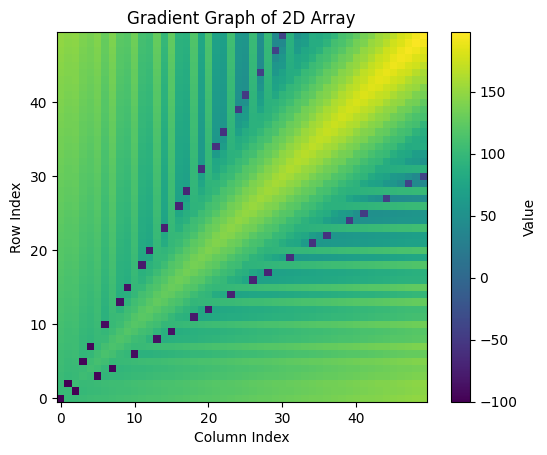

In [45]:
import numpy as np
N = 100

def move(point,arr):
  list1 = []
  for i in range(point[0]):
    list1.append(point[0]-i-arr[i,point[1]])
  for i in range(point[1]):
    list1.append(point[1]-i-arr[point[0],i])
  for i in range(1,min(point[0],point[1])+1):
    list1.append(2*i-arr[point[0]-i,point[1]-i])
  if len(list1)==0:
    return arr
  arr[point[0],point[1]] = max(list1)
  return arr
shape = (50,50)
arr = np.full(shape,0)
arr[0,0] = -N
for i in range(shape[0]):
  for j in range(shape[1]):
    arr = move([i,j],arr)
print(arr)

import matplotlib.pyplot as plt

plt.imshow(arr, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')

plt.title('Gradient Graph of 2D Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.gca().invert_yaxis()

plt.show()


NAS scoring nim variation 1 for 3d

rules - 3 piles of stones
- one can remove any number of stones for any pile
- one can remove equal number of stones from any 2 piles

In [41]:
import numpy as np
N = 0

def move(point,arr):
  list1 = []
  for i in range(point[0]):
    list1.append(point[0]-i-arr[i,point[1],point[2]])
  for i in range(point[1]):
    list1.append(point[1]-i-arr[point[0],i,point[2]])
  for i in range(point[2]):
    list1.append(point[2]-i-arr[point[0],point[1],i])

  for i in range(1,min(point[0],point[1])+1):
    list1.append(2*i-arr[point[0]-i,point[1]-i,point[2]])
  for i in range(1,min(point[0],point[2])+1):
    list1.append(2*i-arr[point[0]-i,point[1],point[2]-i])
  for i in range(1,min(point[2],point[1])+1):
    list1.append(2*i-arr[point[0],point[1]-i,point[2]-i])

  if len(list1)==0:
    return arr
  arr[point[0],point[1],point[2]] = max(list1)
  return arr
shape = (50,50,50)
arr = np.full(shape,0)
arr[0,0,0] = -N
for i in range(shape[0]):
  for j in range(shape[1]):
    for k in range(shape[2]):
      arr = move([i,j,k],arr)
print(arr)

def show_slice(k):
    plt.figure(figsize=(6, 6))
    plt.imshow(arr[k], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(f"Slice at depth = {k}")
    plt.xlabel("Column index")
    plt.ylabel("Row index")
    plt.gca().invert_yaxis()
    plt.show()

# Interactive slider
interact(
    show_slice,
    k=IntSlider(min=0, max=arr.shape[0]-1, step=1, value=0, description='Depth')
)

[[[100 -99 100 101 102]
  [-99 100 101 102 103]
  [100 101 -96 103  98]
  [101 102 103  98 105]
  [102 103  98 105 100]]

 [[-99 100 101 102 103]
  [100 101 -98  99 100]
  [101 -98 103 100 101]
  [102  99 100 105 102]
  [103 100 101 102 107]]

 [[100 101 -96 103  98]
  [101 -98 103 100 101]
  [-96 103 100  99 100]
  [103 100  99 102 -95]
  [ 98 101 100 -95 104]]

 [[101 102 103  98 105]
  [102  99 100 105 102]
  [103 100  99 102 -95]
  [ 98 105 102 -95  96]
  [105 102 -95  96  97]]

 [[102 103  98 105 100]
  [103 100 101 102 107]
  [ 98 101 100 -95 104]
  [105 102 -95  96  97]
  [100 107 104  97 -94]]]


interactive(children=(IntSlider(value=0, description='Depth', max=4), Output()), _dom_classes=('widget-interac…

<function __main__.show_slice(k)>

whytoff scoring nim variation 2 for 3d

rules - 3 piles of stones
- one can remove any number of stones for any pile
- one can remove equal number of stones from all 3 piles


In [ ]:
import numpy as np
N = 0

def move(point,arr):
  list1 = []
  for i in range(point[0]):
    list1.append(point[0]-i-arr[i,point[1],point[2]])
  for i in range(point[1]):
    list1.append(point[1]-i-arr[point[0],i,point[2]])
  for i in range(point[2]):
    list1.append(point[2]-i-arr[point[0],point[1],i])
  for i in range(1,min(point[0],point[1],point[2])+1):
    list1.append(3*i-arr[point[0]-i,point[1]-i,point[2]-i])
  if len(list1)==0:
    return arr
  arr[point[0],point[1],point[2]] = max(list1)
  return arr
shape = (50,50,50)
arr = np.full(shape,0)
arr[0,0,0] = -N
for i in range(shape[0]):
  for j in range(shape[1]):
    for k in range(shape[2]):
      arr = move([i,j,k],arr)
print(arr)

def show_slice(k):
    plt.figure(figsize=(6, 5))
    plt.imshow(arr[k], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(f"Slice at depth = {k}")
    plt.xlabel("Column index")
    plt.ylabel("Row index")
    plt.gca().invert_yaxis()
    plt.show()

# Interactive slider
interact(
    show_slice,
    k=IntSlider(min=0, max=arr.shape[0]-1, step=1, value=0, description='Depth')
)

[[[  0   1   2 ...  47  48  49]
  [  1   0   1 ...  46  47  48]
  [  2   1   0 ...  45  46  47]
  ...
  [ 47  46  45 ...   0   1   2]
  [ 48  47  46 ...   1   0   1]
  [ 49  48  47 ...   2   1   0]]

 [[  1   0   1 ...  46  47  48]
  [  0   3   2 ...  47  48  49]
  [  1   2   3 ...  46  47  48]
  ...
  [ 46  47  46 ...   3   2   3]
  [ 47  48  47 ...   2   3   2]
  [ 48  49  48 ...   3   2   3]]

 [[  2   1   0 ...  45  46  47]
  [  1   2   3 ...  46  47  48]
  [  0   3   6 ...  47  48  49]
  ...
  [ 45  46  47 ...   6   5   4]
  [ 46  47  48 ...   5   6   5]
  [ 47  48  49 ...   4   5   6]]

 ...

 [[ 47  46  45 ...   0   1   2]
  [ 46  47  46 ...   3   2   3]
  [ 45  46  47 ...   6   5   4]
  ...
  [  0   3   6 ... 141 140 139]
  [  1   2   5 ... 140 141 140]
  [  2   3   4 ... 139 140 141]]

 [[ 48  47  46 ...   1   0   1]
  [ 47  48  47 ...   2   3   2]
  [ 46  47  48 ...   5   6   5]
  ...
  [  1   2   5 ... 140 141 140]
  [  0   3   6 ... 141 144 143]
  [  1   2   5 ... 140 143 1

interactive(children=(IntSlider(value=0, description='Depth', max=49), Output()), _dom_classes=('widget-intera…

<function __main__.show_slice(k)>

whytoff scoring nim variation 3 for 3d

rules - 3 piles of stones
- one can remove any number of stones for any pile
- one can remove equal number of stones from any 2 piles
- one can remove equal number of stones from all 3 piles



In [ ]:
import numpy as np
N = 0

def move(point,arr):
  list1 = []
  for i in range(point[0]):
    list1.append(point[0]-i-arr[i,point[1],point[2]])
  for i in range(point[1]):
    list1.append(point[1]-i-arr[point[0],i,point[2]])
  for i in range(point[2]):
    list1.append(point[2]-i-arr[point[0],point[1],i])
  for i in range(1,min(point[0],point[1],point[2])+1):
    list1.append(3*i-arr[point[0]-i,point[1]-i,point[2]-i])
  for i in range(1,min(point[0],point[1])+1):
    list1.append(2*i-arr[point[0]-i,point[1]-i,point[2]])
  for i in range(1,min(point[0],point[2])+1):
    list1.append(2*i-arr[point[0]-i,point[1],point[2]-i])
  for i in range(1,min(point[2],point[1])+1):
    list1.append(2*i-arr[point[0],point[1]-i,point[2]-i])

  if len(list1)==0:
    return arr
  arr[point[0],point[1],point[2]] = max(list1)
  return arr
shape = (50,50,50)
arr = np.full(shape,0)
arr[0,0,0] = -N
for i in range(shape[0]):
  for j in range(shape[1]):
    for k in range(shape[2]):
      arr = move([i,j,k],arr)
print(arr)

def show_slice(k):
    plt.figure(figsize=(6, 5))
    plt.imshow(arr[k], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(f"Slice at depth = {k}")
    plt.xlabel("Column index")
    plt.ylabel("Row index")
    plt.gca().invert_yaxis()
    plt.show()

# Interactive slider
interact(
    show_slice,
    k=IntSlider(min=0, max=arr.shape[0]-1, step=1, value=0, description='Depth')
)

[[[  0   1   2 ...  47  48  49]
  [  1   2   1 ...  46  47  48]
  [  2   1   4 ...  45  46  47]
  ...
  [ 47  46  45 ...  94  93  92]
  [ 48  47  46 ...  93  96  95]
  [ 49  48  47 ...  92  95  98]]

 [[  1   2   1 ...  46  47  48]
  [  2   3   2 ...  45  46  47]
  [  1   2   3 ...  46  47  48]
  ...
  [ 46  45  46 ...  93  92  93]
  [ 47  46  47 ...  92  95  94]
  [ 48  47  48 ...  93  94  97]]

 [[  2   1   4 ...  45  46  47]
  [  1   2   3 ...  46  47  48]
  [  4   3   6 ...  43  44  45]
  ...
  [ 45  46  43 ...  92  93  90]
  [ 46  47  44 ...  93  94  95]
  [ 47  48  45 ...  90  95  96]]

 ...

 [[ 47  46  45 ...  94  93  92]
  [ 46  45  46 ...  93  92  93]
  [ 45  46  43 ...  92  93  90]
  ...
  [ 94  93  92 ... 141 140 139]
  [ 93  92  93 ... 140 139 140]
  [ 92  93  90 ... 139 140 137]]

 [[ 48  47  46 ...  93  96  95]
  [ 47  46  47 ...  92  95  94]
  [ 46  47  44 ...  93  94  95]
  ...
  [ 93  92  93 ... 140 139 140]
  [ 96  95  94 ... 139 144 143]
  [ 95  94  95 ... 140 143 1

interactive(children=(IntSlider(value=0, description='Depth', max=49), Output()), _dom_classes=('widget-intera…

<function __main__.show_slice(k)>

yama scoring nim

moving rules:
- a player can remove i(>1) stones from one pile and add one to the other pile
- you get one point for removing a stone
- you get N points for removing the last stone/ for being the last person who can make a valid move

[[ 0  0  2 ... 47 48 49]
 [ 0  0  0 ... 46 47 48]
 [ 2  0 -1 ... 45 46 47]
 ...
 [47 46 45 ... -1  0  2]
 [48 47 46 ...  0 -1  0]
 [49 48 47 ...  2  0  0]]


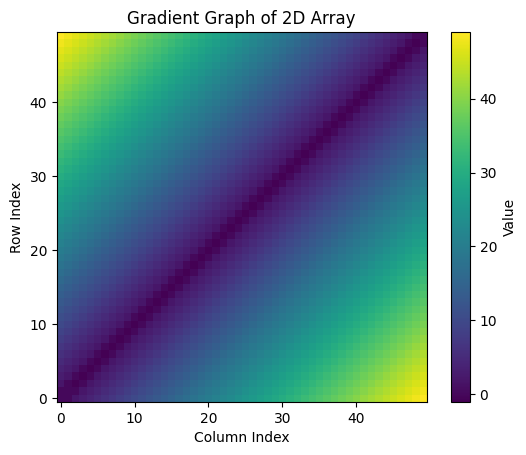

In [ ]:
import numpy as np
N = 0
def move(point,arr,d1,d2):
  list1 = []
  if point[1] < d2-1:
    for i in range(point[0]-1):
      list1.append(point[0]-i-arr[i,point[1]+1])
  if point[0] < d1-1:
    for i in range(point[1]-1):
        list1.append(point[1]-i-arr[point[0]+1,i])
  if len(list1)==0:
    return arr
  arr[point[0],point[1]] = max(list1)
  return arr
shape = (50,50)
arr = np.full(shape,0)
arr[0,0] = -N
arr[0,1] = -N
arr[1,0] = -N
arr[1,1] = -N
for i in range(shape[0] + shape[1]):
  for j in range(i+1):
    if j < shape[0] and i-j < shape[1]:
      arr = move([j,i-j],arr,shape[0],shape[1])
print(arr)


import matplotlib.pyplot as plt

plt.imshow(arr, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')

plt.title('Gradient Graph of 2D Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.gca().invert_yaxis()

plt.show()


yama scoring nim 3d

rules - 3 piles
- a player can remove i(>1) stones from one pile and add 1 stone to a particular pile

In [ ]:
import numpy as np
N = 0
def move(point,arr,d1,d2,d3):
  list1 = []
  if point[1] < d2-1:
    for i in range(point[0]-1):
      list1.append(point[0]-i-arr[i,point[1]+1,point[2]])
  if point[1] < d2-1:
    for i in range(point[2]-1):
      list1.append(point[2]-i-arr[point[0],point[1]+1,i])
  if point[0] < d1-1:
    for i in range(point[1]-1):
        list1.append(point[1]-i-arr[point[0]+1,i,point[2]])
  if point[0] < d1-1:
    for i in range(point[2]-1):
        list1.append(point[2]-i-arr[point[0]+1,point[1],i])
  if point[2] < d3-1:
    for i in range(point[0]-1):
      list1.append(point[0]-i-arr[i,point[1],point[2]+1])
  if point[2] < d3-1:
    for i in range(point[1]-1):
      list1.append(point[1]-i-arr[point[0],i,point[2]+1])
  if len(list1)==0:
    return arr
  arr[point[0],point[1],point[2]] = max(list1)
  return arr
shape = (10,10,10)
arr = np.full(shape,0)
arr[0,0,0] = -N
arr[0,1,0] = -N
arr[1,0,0] = -N
arr[1,1,0] = -N
arr[0,0,1] = -N
arr[0,1,1] = -N
arr[1,0,1] = -N
arr[1,1,1] = -N

for i in range(shape[0] + shape[1]+ shape[2]):
  for j in range(i+1):
    for k in range(i-j+1):

      if j < shape[0] and k < shape[1] and i-j-k < shape[2]:
        arr = move([j,k,i-j-k],arr,shape[0],shape[1],shape[2])
print(arr)

def show_slice(k):
    plt.figure(figsize=(6, 6))
    plt.imshow(arr[k], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(f"Slice at depth = {k}")
    plt.xlabel("Column index")
    plt.ylabel("Row index")
    plt.gca().invert_yaxis()
    plt.show()

# Interactive slider
interact(
    show_slice,
    k=IntSlider(min=0, max=arr.shape[0]-1, step=1, value=0, description='Depth')
)


[[[0 0 2 3 4 5 6 7 8 9]
  [0 0 2 3 4 5 6 7 8 9]
  [2 2 0 2 3 4 5 6 7 8]
  [3 3 2 0 1 2 3 4 5 6]
  [4 4 3 1 0 1 2 3 4 5]
  [5 5 4 2 1 0 1 2 3 4]
  [6 6 5 3 2 1 0 1 2 3]
  [7 7 6 4 3 2 1 0 1 2]
  [8 8 7 5 4 3 2 1 0 1]
  [9 9 8 6 5 4 3 2 1 0]]

 [[0 0 2 3 4 5 6 7 8 9]
  [0 0 0 2 3 4 5 6 7 8]
  [2 0 2 3 4 5 6 7 8 9]
  [3 2 3 1 2 3 4 5 6 7]
  [4 3 4 2 1 2 3 4 5 6]
  [5 4 5 3 2 1 2 3 4 5]
  [6 5 6 4 3 2 1 2 3 4]
  [7 6 7 5 4 3 2 1 2 3]
  [8 7 8 6 5 4 3 2 1 2]
  [9 8 9 7 6 5 4 3 2 1]]

 [[2 2 0 2 3 4 5 6 7 8]
  [2 0 2 3 4 5 6 7 8 9]
  [0 2 0 2 2 3 4 5 6 7]
  [2 3 2 3 4 5 6 7 8 9]
  [3 4 2 4 3 4 5 6 7 8]
  [4 5 3 5 4 3 4 5 6 7]
  [5 6 4 6 5 4 3 4 5 6]
  [6 7 5 7 6 5 4 3 4 5]
  [7 8 6 8 7 6 5 4 3 4]
  [8 9 7 9 8 7 6 5 4 3]]

 [[3 3 2 0 1 2 3 4 5 6]
  [3 2 3 1 2 3 4 5 6 7]
  [2 3 2 3 4 5 6 7 8 9]
  [0 1 3 2 3 4 5 6 7 8]
  [1 2 4 3 4 5 6 7 8 9]
  [2 3 5 4 5 4 5 6 7 8]
  [3 4 6 5 6 5 4 5 6 7]
  [4 5 7 6 7 6 5 4 5 6]
  [5 6 8 7 8 7 6 5 4 5]
  [6 7 9 8 9 8 7 6 5 4]]

 [[4 4 3 1 0 1 2 3 4 5]
  [4 3 4

interactive(children=(IntSlider(value=0, description='Depth', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.show_slice(k)>

## Code for heatmap

In [46]:
#for normal scoring nim

# nim_visuals_allN_slider_full.py
import numpy as np
import plotly.graph_objects as go
import time
import os

# ----------------- user parameters -----------------
rows, cols = 50, 50        # grid size (a in [0,rows-1], b in [0,cols-1])
max_abs_N = 100            # sweeps N = -max_abs_N .. +max_abs_N
Ns = list(range(-max_abs_N, max_abs_N + 1))
out_dir = "."              # where to save HTML files
cache_dir = "./cache_nim"  # cache DP arrays here to avoid recomputation
# ---------------------------------------------------

def compute_dp(rows, cols, N):
    """
    Compute arr[a,b] for scoring Nim with base arr[0,0] = -N.
    Returns numpy array shape (rows,cols), dtype=int32.
    """
    arr = np.full((rows, cols), 0, dtype=np.int32)
    arr[0, 0] = -N
    for a in range(rows):
        for b in range(cols):
            if a == 0 and b == 0:
                continue
            # gather candidate values for reducing first/second pile
            best = None
            # reduce first pile a -> k (k in [0..a-1])
            for k in range(a):
                val = (a - k) - arr[k, b]
                if best is None or val > best:
                    best = val
            # reduce second pile b -> k (k in [0..b-1])
            for k in range(b):
                val = (b - k) - arr[a, k]
                if best is None or val > best:
                    best = val
            if best is not None:
                arr[a, b] = best
    return arr

def ensure_cache_dir():
    if not os.path.isdir(cache_dir):
        os.makedirs(cache_dir)

def load_or_compute(rows, cols, N):
    """
    Try to load the DP array for given N from cache. If missing, compute and save.
    """
    ensure_cache_dir()
    fname = os.path.join(cache_dir, f"arr_N={N}_r={rows}_c={cols}.npy")
    if os.path.isfile(fname):
        arr = np.load(fname)
    else:
        arr = compute_dp(rows, cols, N)
        np.save(fname, arr)
    return arr

def main():
    if not os.path.isdir(out_dir):
        os.makedirs(out_dir)

    start_all = time.time()
    arrs = []
    vmin, vmax = float("inf"), float("-inf")

    print(f"Preparing DP arrays for N from {Ns[0]} to {Ns[-1]} on {rows}x{cols} grid.")
    for idx, N in enumerate(Ns):
        t0 = time.time()
        arrN = load_or_compute(rows, cols, N)
        arrs.append(arrN)
        vmin = min(vmin, float(arrN.min()))
        vmax = max(vmax, float(arrN.max()))
        print(f"[{idx+1:03}/{len(Ns)}] N={N:4d}  min={arrN.min():4d}  max={arrN.max():4d}  time={(time.time()-t0):.2f}s")
    print(f"All Ns computed/loaded. Total time = {time.time() - start_all:.2f}s")
    print(f"Global color range: vmin={vmin}, vmax={vmax}\n")

    # Convert to Python lists so Plotly can serialize easily
    arrs_list = [a.tolist() for a in arrs]

    # ---------- Heatmap with slider ----------
    heat = go.Figure(
        data=go.Heatmap(
            z=arrs_list[0],
            x=np.arange(cols),
            y=np.arange(rows),
            colorscale="RdBu",
            zmin=vmin,
            zmax=vmax,
            reversescale=False,
            colorbar=dict(title="V(a,b)"),
            hovertemplate="a=%{y}, b=%{x}<br>value=%{z}<extra></extra>"
        )
    )

    # build slider steps for each integer N
    steps = []
    for i, N in enumerate(Ns):
        step = dict(
            method="restyle",
            args=["z", [arrs_list[i]]],    # replace the heatmap z array
            label=str(N)
        )
        steps.append(step)

    heat.update_layout(
        title=f"Heatmap of V(a,b)  —  N = {Ns[0]} (use slider)",
        xaxis_title="b (pile 2 size)",
        yaxis_title="a (pile 1 size)",
        width=900,
        height=800,
        sliders=[dict(
            active=Ns.index(0) if 0 in Ns else 0,
            currentvalue={"prefix": "N = "},
            pad={"t": 50},
            steps=steps
        )]
    )

    heat_file = os.path.join(out_dir, "nim_heatmap_slider_allN_full.html")
    heat.write_html(heat_file)
    print(f"Saved heatmap (with slider) to {heat_file}")

    # ---------- Surface with slider ----------
    surface = go.Figure(
        data=go.Surface(
            z=arrs_list[0],
            x=np.arange(cols),
            y=np.arange(rows),
            colorscale="RdBu",
            cmin=vmin,
            cmax=vmax,
            reversescale=False,
            colorbar=dict(title="V(a,b)")
        )
    )

    surf_steps = []
    for i, N in enumerate(Ns):
        step = dict(
            method="restyle",
            args=["z", [arrs_list[i]]],    # replace surface z
            label=str(N)
        )
        surf_steps.append(step)

    surface.update_layout(
        title=f"Surface of V(a,b)  —  N = {Ns[0]} (use slider)",
        scene=dict(
            xaxis_title="b (pile 2 size)",
            yaxis_title="a (pile 1 size)",
            zaxis_title="V(a,b)"
        ),
        width=1100, height=900,
        sliders=[dict(
            active=Ns.index(0) if 0 in Ns else 0,
            currentvalue={"prefix": "N = "},
            pad={"t": 50},
            steps=surf_steps
        )]
    )

    surf_file = os.path.join(out_dir, "nim_surface_slider_allN_full.html")
    surface.write_html(surf_file)
    print(f"Saved surface (with slider) to {surf_file}")

    print("\nDone. Open the HTML files in a browser (they may be large).")
    print(f"Cache directory: {cache_dir} (re-run will reuse cached arrays)")

if __name__ == "__main__":
    main()


Preparing DP arrays for N from -100 to 100 on 50x50 grid.
[001/201] N=-100  min= -99  max= 148  time=0.13s
[002/201] N= -99  min= -98  max= 147  time=0.17s
[003/201] N= -98  min= -97  max= 146  time=0.18s
[004/201] N= -97  min= -96  max= 145  time=0.22s
[005/201] N= -96  min= -95  max= 144  time=0.21s
[006/201] N= -95  min= -94  max= 143  time=0.14s
[007/201] N= -94  min= -93  max= 142  time=0.10s
[008/201] N= -93  min= -92  max= 141  time=0.17s
[009/201] N= -92  min= -91  max= 140  time=0.19s
[010/201] N= -91  min= -90  max= 139  time=0.09s
[011/201] N= -90  min= -89  max= 138  time=0.07s
[012/201] N= -89  min= -88  max= 137  time=0.07s
[013/201] N= -88  min= -87  max= 136  time=0.11s
[014/201] N= -87  min= -86  max= 135  time=0.10s
[015/201] N= -86  min= -85  max= 134  time=0.08s
[016/201] N= -85  min= -84  max= 133  time=0.08s
[017/201] N= -84  min= -83  max= 132  time=0.07s
[018/201] N= -83  min= -82  max= 131  time=0.07s
[019/201] N= -82  min= -81  max= 130  time=0.10s
[020/201] N

In [47]:
#for NAS rewarding nim
# nim_heatmap_slider_diag_allN_full.py
import numpy as np
import plotly.graph_objects as go
import os, time

# ---------------- user parameters ----------------
rows, cols = 50, 50           # grid size (a in [0,rows-1], b in [0,cols-1])
max_abs_N = 100               # sweep N = -max_abs_N .. +max_abs_N
Ns = list(range(-max_abs_N, max_abs_N + 1))
out_dir = "."                 # output directory
cache_dir = "./cache_nim_diag"  # cache DP arrays here
out_file = os.path.join(out_dir, "nim_heatmap_slider_diag_allN_full.html")
# -------------------------------------------------

def compute_dp(rows, cols, N):
    """
    Compute arr[a,b] for scoring Nim with:
      - single-pile reductions (first or second pile)
      - diagonal simultaneous removal of i from both piles with immediate gain 2*i
    Base: arr[0,0] = -N
    Returns numpy array shape (rows,cols), dtype=int32.
    """
    arr = np.full((rows, cols), 0, dtype=np.int32)
    arr[0, 0] = -N
    for a in range(rows):
        for b in range(cols):
            if a == 0 and b == 0:
                continue
            best = None
            # reduce first pile a -> k (k in 0..a-1)
            for k in range(a):
                val = (a - k) - arr[k, b]
                if best is None or val > best:
                    best = val
            # reduce second pile b -> k (k in 0..b-1)
            for k in range(b):
                val = (b - k) - arr[a, k]
                if best is None or val > best:
                    best = val
            # diagonal removal: remove i from both piles (1..min(a,b))
            m = min(a, b)
            for i in range(1, m + 1):
                val = 2 * i - arr[a - i, b - i]
                if best is None or val > best:
                    best = val
            if best is not None:
                arr[a, b] = best
    return arr

def ensure_dir(d):
    if not os.path.isdir(d):
        os.makedirs(d)

def load_or_compute(rows, cols, N):
    ensure_dir(cache_dir)
    fname = os.path.join(cache_dir, f"arr_diag_N={N}_r={rows}_c={cols}.npy")
    if os.path.isfile(fname):
        return np.load(fname)
    arr = compute_dp(rows, cols, N)
    np.save(fname, arr)
    return arr

def main():
    ensure_dir(out_dir)
    start_all = time.time()

    arrs = []
    vmin, vmax = float("inf"), float("-inf")
    print(f"Computing DP for N from {Ns[0]} to {Ns[-1]} on {rows}x{cols} grid (with diagonal moves)...")
    for idx, N in enumerate(Ns):
        t0 = time.time()
        arrN = load_or_compute(rows, cols, N)
        arrs.append(arrN)
        vmin = min(vmin, float(arrN.min()))
        vmax = max(vmax, float(arrN.max()))
        if (idx+1) % 20 == 0 or idx == 0 or idx == len(Ns)-1:
            print(f"[{idx+1:03}/{len(Ns)}] N={N:4d}  min={arrN.min():4d}  max={arrN.max():4d}  time={(time.time()-t0):.2f}s")
    print(f"All Ns ready. Total time = {time.time() - start_all:.2f}s")
    print(f"Global color range: vmin={vmin}, vmax={vmax}\n")

    # Convert to lists for Plotly serialization
    arrs_list = [a.tolist() for a in arrs]

    # ---------- Heatmap with slider (2D visualization) ----------
    heat = go.Figure(
        data=go.Heatmap(
            z=arrs_list[0],
            x=np.arange(cols),   # b axis (pile 2)
            y=np.arange(rows),   # a axis (pile 1)
            colorscale="RdBu",
            zmin=vmin,
            zmax=vmax,
            reversescale=False,
            colorbar=dict(title="V(a,b)"),
            hovertemplate="a=%{y}, b=%{x}<br>value=%{z}<extra></extra>"
        )
    )

    # slider steps (one per integer N)
    steps = []
    for i, N in enumerate(Ns):
        step = dict(
            method="restyle",
            args=["z", [arrs_list[i]]],    # update heatmap z
            label=str(N)
        )
        steps.append(step)

    heat.update_layout(
        title=f"Heatmap of V(a,b) with diagonal moves — N = {Ns[0]} (use slider)",
        xaxis_title="b (pile 2 size)",
        yaxis_title="a (pile 1 size)",
        width=900,
        height=850,
        sliders=[dict(
            active=Ns.index(0) if 0 in Ns else 0,
            currentvalue={"prefix": "N = "},
            pad={"t": 50},
            steps=steps
        )]
    )

    heat.write_html(out_file)
    print(f"Saved heatmap (with slider) to {out_file}")
    print(f"Cache directory used: {cache_dir}")
    print("\nDone. In Colab: open the left Files pane and download the HTML or embed with IFrame.")

if __name__ == "__main__":
    main()


Computing DP for N from -100 to 100 on 50x50 grid (with diagonal moves)...
[001/201] N=-100  min= -99  max= 195  time=0.10s
[020/201] N= -81  min= -80  max= 176  time=0.32s
[040/201] N= -61  min= -60  max= 156  time=0.19s
[060/201] N= -41  min= -40  max= 136  time=0.05s
[080/201] N= -21  min= -20  max= 116  time=0.05s
[100/201] N=  -1  min=   0  max=  97  time=0.05s
[120/201] N=  19  min= -19  max= 117  time=0.05s
[140/201] N=  39  min= -39  max= 137  time=0.05s
[160/201] N=  59  min= -59  max= 157  time=0.05s
[180/201] N=  79  min= -79  max= 177  time=0.05s
[200/201] N=  99  min= -99  max= 197  time=0.14s
[201/201] N= 100  min=-100  max= 198  time=0.12s
All Ns ready. Total time = 18.39s
Global color range: vmin=-100.0, vmax=198.0

Saved heatmap (with slider) to ./nim_heatmap_slider_diag_allN_full.html
Cache directory used: ./cache_nim_diag

Done. In Colab: open the left Files pane and download the HTML or embed with IFrame.
